# Linear Sequential Estimation

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(1)

In [2]:
# Import functions directly from github
# Important: note that we use raw.githubusercontent.com, not github.com

import requests
url = 'https://raw.githubusercontent.com/florisvb/Nonlinear_and_Data_Driven_Estimation/main/Utility/plot_utility.py'
r = requests.get(url)

# Store the file to the colab working directory
with open('plot_utility.py', 'w') as f:
    f.write(r.text)

# import the function we want from that file
from plot_utility import plot_tme

# Generate sample time series data

In [3]:
t = np.linspace(0, 6, 500)
x = np.array([[1, 1, 2, -0.4e-4]]).T
H = np.vstack([t, np.sin(t), np.cos(2*t), np.exp(t)]).T
y = H@x

In [12]:
H.shape

(500, 4)

In [14]:
x.shape

(4, 1)

# Add some normal (gaussian) noise

In [4]:
# Example for Gaussian (normal) random variable

noise_mean = 0
noise_std = 0.5

v = np.column_stack(np.random.normal(noise_mean, noise_std, len(y))).T

In [5]:
y_tilde = y+v

In [6]:
#each line is a batch
y_tilde

array([[ 2.81213268],
       [ 1.71755083],
       [ 1.78165423],
       [ 1.53040814],
       [ 2.51958985],
       [ 0.95495208],
       [ 2.9958058 ],
       [ 1.75931998],
       [ 2.31481412],
       [ 2.0448314 ],
       [ 2.91364737],
       [ 1.16445922],
       [ 2.04412175],
       [ 2.0229744 ],
       [ 2.79043451],
       [ 1.68103651],
       [ 2.15109231],
       [ 1.80360182],
       [ 2.26777192],
       [ 2.54112571],
       [ 1.70139091],
       [ 2.82498494],
       [ 2.70329273],
       [ 2.50258256],
       [ 2.69957779],
       [ 1.90408993],
       [ 2.18031621],
       [ 1.76870183],
       [ 2.09650039],
       [ 2.48852815],
       [ 1.86949009],
       [ 2.0079943 ],
       [ 1.85293287],
       [ 1.76317959],
       [ 1.83855557],
       [ 2.15539404],
       [ 1.58978929],
       [ 2.25156023],
       [ 2.949371  ],
       [ 2.47483939],
       [ 1.99149748],
       [ 1.62647033],
       [ 1.6788683 ],
       [ 2.88015232],
       [ 2.04014361],
       [ 1

# Plotting

<Axes: xlabel='Time', ylabel='y'>

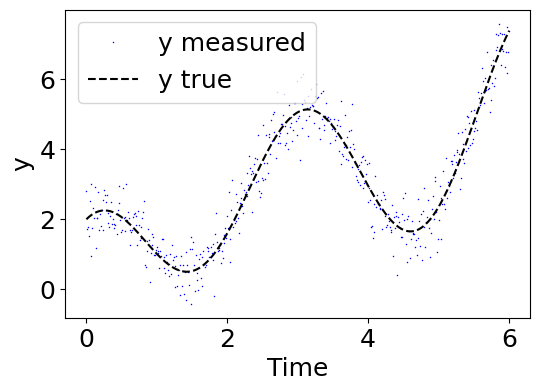

In [7]:
plot_tme(t, y, y_tilde)

# Candidate models

In [173]:
model_1_H = np.vstack([t, np.sin(t), np.cos(2*t)]).T

In [174]:
model_1_H.shape


(500, 3)

In [178]:
model_1_H[0:1,:].shape

(1, 3)

# Exercise

Implement Linear Sequential Estimation, and plot the three parameters of $x$ over time

In [ ]:
#assumptions: start with a guess of state x (vector of 3)\

## 2nd gain equation
# Pk should be 3x3
# k is defined as PH'W -- we know H already from model --- each iteration H should be 1x3 (total shape is 500x3) (will be 3x1 since transposed)
# W can be indentity matrix -- will be 1x1 for this case

## 3rd equation
#initialize Pk^-1 as any value

In [40]:
model_1_H[1]

array([0.01202405, 0.01202376, 0.99971086])

In [187]:
x_hat[0].shape
np.array(model_1_H[0:1,:]).shape

(1, 3)

In [185]:
y_tilde_1 = np.array(model_1_H[0:1,:])@x_hat[0]
y_tilde_1

array([[1.]])

In [167]:
W=[1]
P_inv[0] = [1]
x_hat[0] = np.array([[1,1,1]]).T
K[0] = [1]
#for i in range(0,len(t)-1):
#  P_inv.append(P_inv[i]  + np.atleast_2d(model_1_H[i+1]).T@W@model_1_H[i+1]) #error covariance

#  K.append(np.atleast_2d(np.atleast_2d(P_inv[i+1])@np.atleast_2d(model_1_H[i+1])).T.shape)
 # K.append(np.atleast_2d(P_inv[i+1])@np.atleast_2d(model_1_H[i+1]).T@W) #gain matrix
  #x_hat.append(np.array(x_hat[i]).T + K[i]@(y_tilde_1 - model_1_H[i+1]@np.array(x_hat[i]).T))

array([3, 1])

In [189]:
inv = np.linalg.inv

In [190]:
## doing together with Floris

x0 = np.array([[0,0,0]]).T
x_list = [x0]
inv_P = inv(10*np.eye(3))


for i, y_kp1 in enumerate(y_tilde): #give indices (i) and measurements of y_tilde (y_kp1)
  x_k = x_list[-1]
  H_kp1 = model_1_H[i:i+1,:]
  W = np.array([[1]]) #np.eye(1)

  inv_P = inv_P + H_kp1.T@W@H_kp1
  P = inv(inv_P)
  K = P@H_kp1.T@W
  x_kp1 = x_k + K@(y_kp1 - H_kp1@x_k)

  x_list.append(x_kp1)

In [193]:
X = np.hstack(x_list)
X.shape

(3, 501)

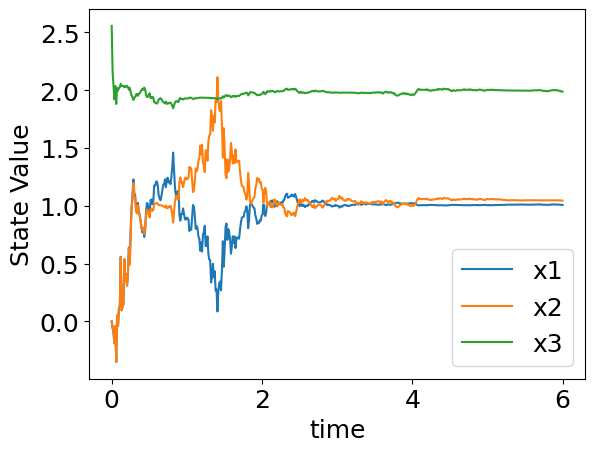

In [198]:
fig,ax = plt.subplots()
ax.plot(t, X[0,1:], label= 'x1')
ax.plot(t, X[1,1:], label='x2')
ax.plot(t, X[2,1:], label='x3')
ax.set_ylabel('State Value')
ax.set_xlabel('time')
ax.legend()